# A simple model of a pandemic

Introduction

---

## How the model works

Neighbours infect each other with probability...

In [1]:
from lattice import SquareLattice
from model import PandemicModel

In [2]:
lattice = SquareLattice(length=200, periodic=False)
model = PandemicModel(lattice) # initialise model with default arguments
help(model)

Help on PandemicModel in module model object:

class PandemicModel(builtins.object)
 |  PandemicModel(lattice, transmission_prob=1.0, vaccine_frac=0.0, initial_infections=1, infection_duration=9223372036854775807, infected_are_immune=False, travel_rate=0)
 |  
 |  Class containing a simple model of a pandemic.
 |  
 |  Inputs
 |  ------
 |  lattice: lattice.SquareLattice
 |      The underlying lattice upon which we perform the simulation.
 |  transmission_prob: float
 |      The probability of an infected node passing the virus onto a neighbouring
 |      uninfected (and non-immune) node.
 |  vaccine_frac: float
 |      The fraction of nodes that are initially flagged as immune against the virus.
 |  initial_infections: (int, float)
 |      The initial number or fraction of infected nodes.
 |  infection_duration: int
 |      Number of days (i.e. time steps) that nodes remains infected.
 |  infected_are_immune: bool
 |      Whether or not nodes which have previously been infected are fl

# Tests

In [21]:
### TESTING SPEED
import timeit

test_lattice = SquareLattice(length=100, periodic=False)
test_model = PandemicModel(
    test_lattice,
    transmission_prob=1.0,
    vaccine_frac=0.4,
    travel_rate=0,
)

#%timeit -n 1 -r 1 test_model.evolve(n_days=500, display_progress_bar=False)

#test_model.travel_rate=0

test_model.init_state(initial_shape="line")
#%timeit -n 1 -r 1 test_model.evolve(n_days=500, display_progress_bar=False)

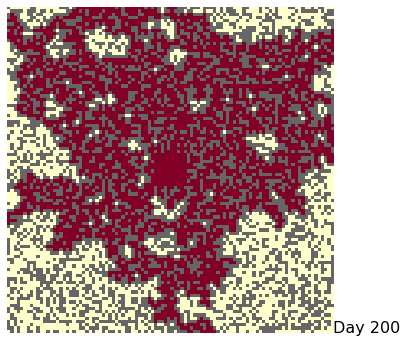

In [22]:
test_model.init_state(initial_shape="nucleus", nucleus_size=10)
test_model.animate(n_days=200, interval=25)

171/201 days spent above the critical threshold of 0.1
Area above critical threshold: 56.2184


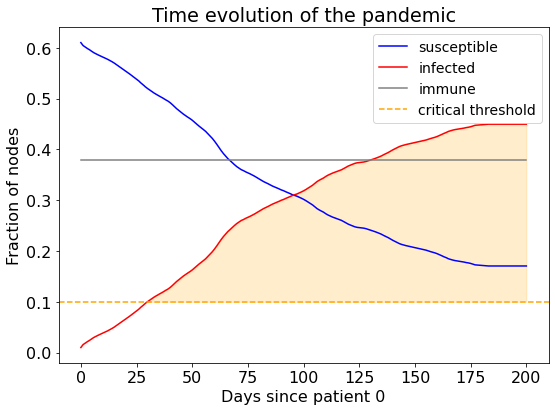

In [19]:
test_model.plot_evolution()

# End tests

# Task 1 : Getting to know the model

## 1.1 : 100% transmission probability

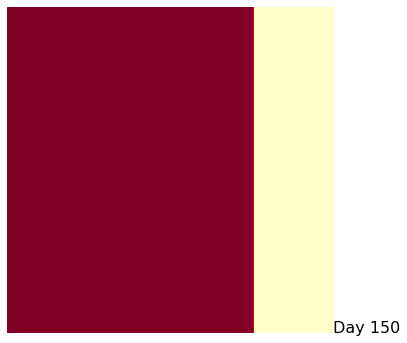

In [5]:
model.init_state(initial_shape="line")
model.animate(n_days=150)

In [ ]:
model.plot_evolution()

## 1.2 : Introducing stochasticity - transmission probability < 1

In [ ]:
model.transmission_prob = 0.25

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

## 1.3 : Recovery and immunity

In [ ]:
model.infection_duration = 21  # 3 weeks
model.infected_are_immune = True

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

## 1.4 Vaccinations

In [ ]:
model.vaccine_frac = 0.4

In [ ]:
model.init_state()
model.animate(n_days=1000)

In [ ]:
model.plot_evolution()

## 1.5 : Mixing (population travel)

In [ ]:
model.travel_rate = 5

In [ ]:
model.init_state()
model.animate(n_days=250)

In [ ]:
model.plot_evolution()

## Task 2 : Finite size effects

## Task 3: Flattening the curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
lengths = np.random.randint(4, 512, size=(25,))
peaks = []
for l in lengths:
    print("length: ", l)
    latt = SquareLattice(length=l)
    mod = PandemicModel(
        latt,
        transmission_prob=0.25,
        vaccine_frac=0.5,
        infected_are_immune=True,
        travel_rate=1,
    )
    mod.evolve(n_days=3*l, display_progress_bar=False)
    peaks.append(max(mod._infected_time_series) / l**2)

fig, ax = plt.subplots()
ax.scatter(lengths, peaks)

plt.show()
        